In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_ev_sales = pd.read_csv(r"C:\Users\dell\Downloads\Data Science and Artificial Intelligence Projects\Global Electronic Vehicle Analysis\IEA Global EV Data 2024.csv")

# Display the columns and first few rows of the dataset
print("Columns in the dataset:")
print(df_ev_sales.columns)
print("\nFirst few rows of the dataset:")
print(df_ev_sales.head())


Columns in the dataset:
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

First few rows of the dataset:
      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000  


In [15]:
# Check for missing values in the dataset
missing_values = df_ev_sales.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


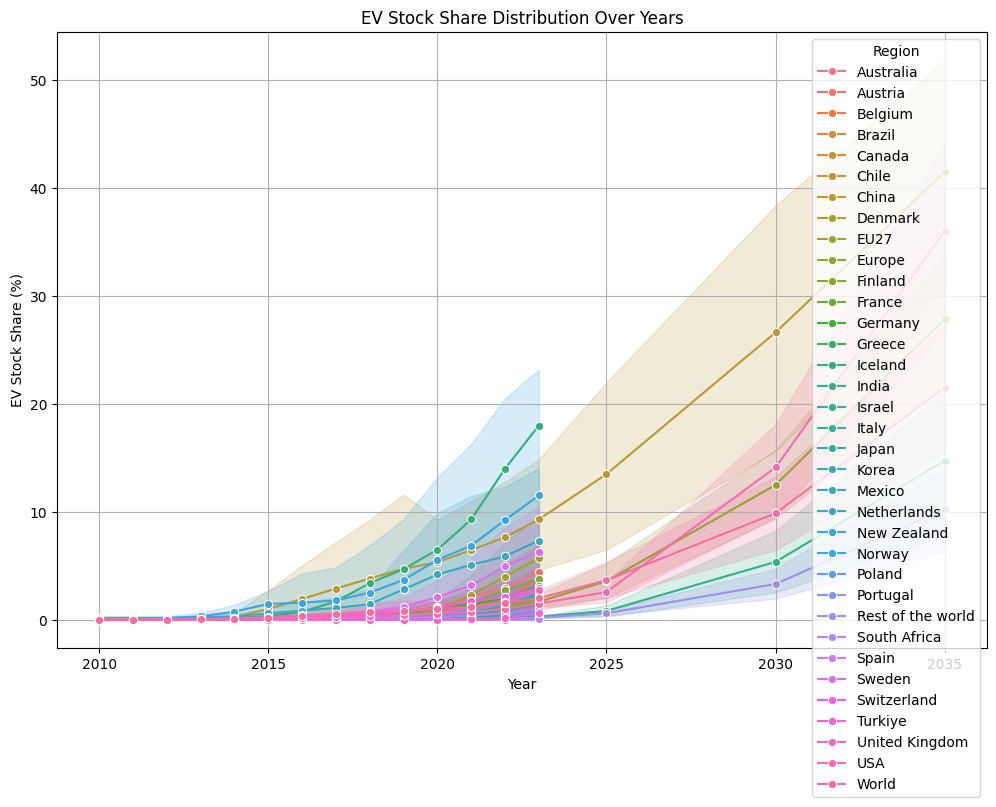

In [16]:
# Filter data for EV stock share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']

# Plot the distribution of EV stock share over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='region', marker='o')
plt.title('EV Stock Share Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


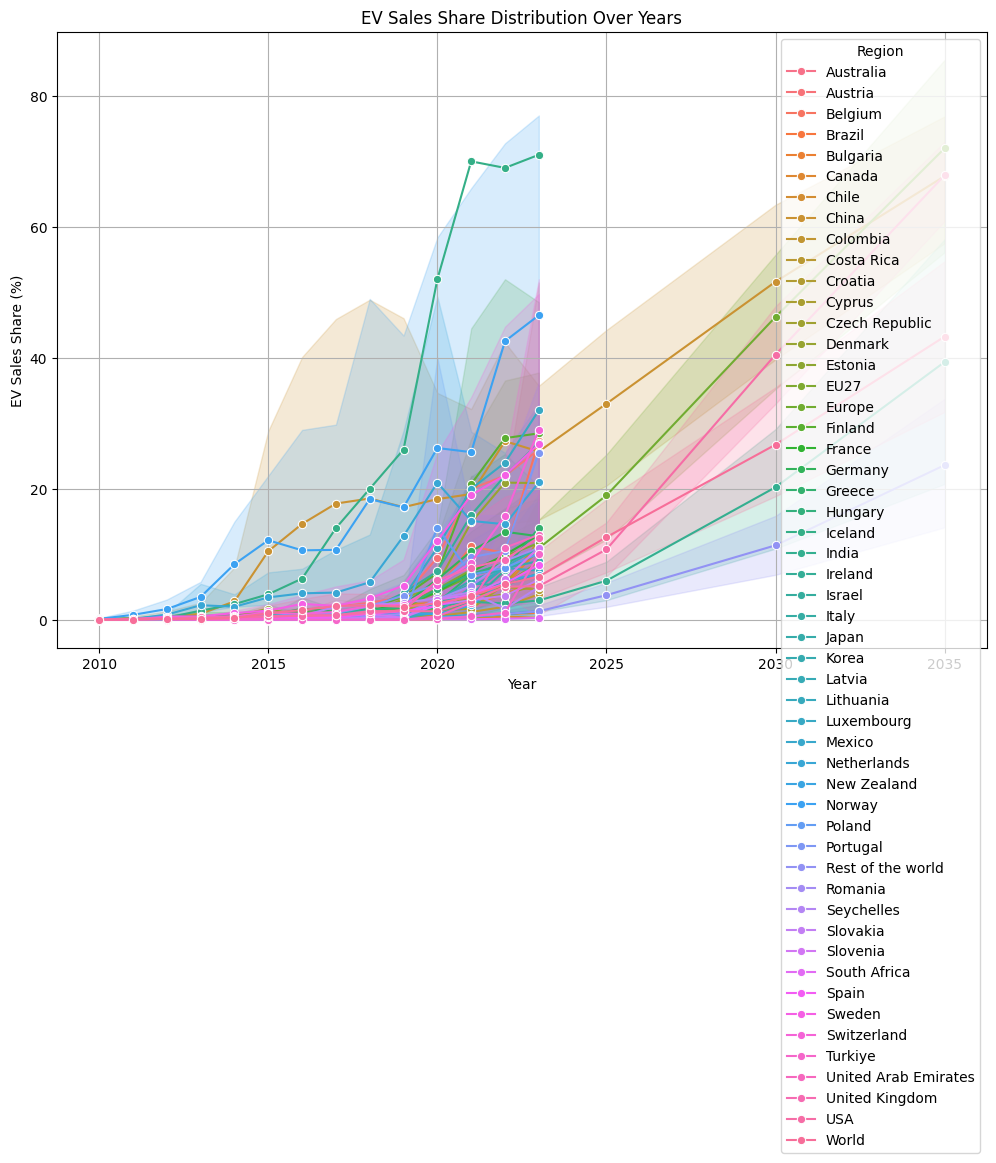

In [17]:
# Filter data for EV sales share
ev_sales_share = df_ev_sales[df_ev_sales['parameter'] == 'EV sales share']

# Plot the distribution of EV sales share over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=ev_sales_share, x='year', y='value', hue='region', marker='o')
plt.title('EV Sales Share Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('EV Sales Share (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


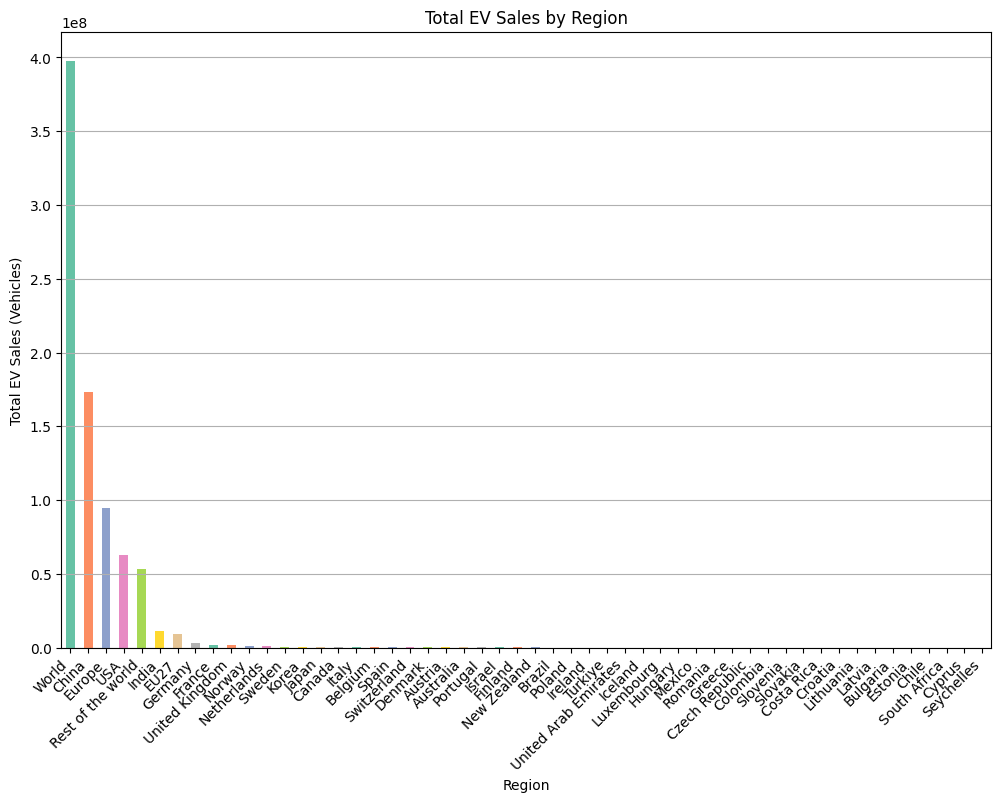

In [18]:
# Filter data for total EV sales
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']

# Aggregate total EV sales by region
total_ev_sales_by_region = ev_sales.groupby('region')['value'].sum().sort_values(ascending=False)

# Plot total EV sales by region
plt.figure(figsize=(12, 8))
total_ev_sales_by_region.plot(kind='bar', color=plt.get_cmap('Set2').colors)
plt.title('Total EV Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total EV Sales (Vehicles)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


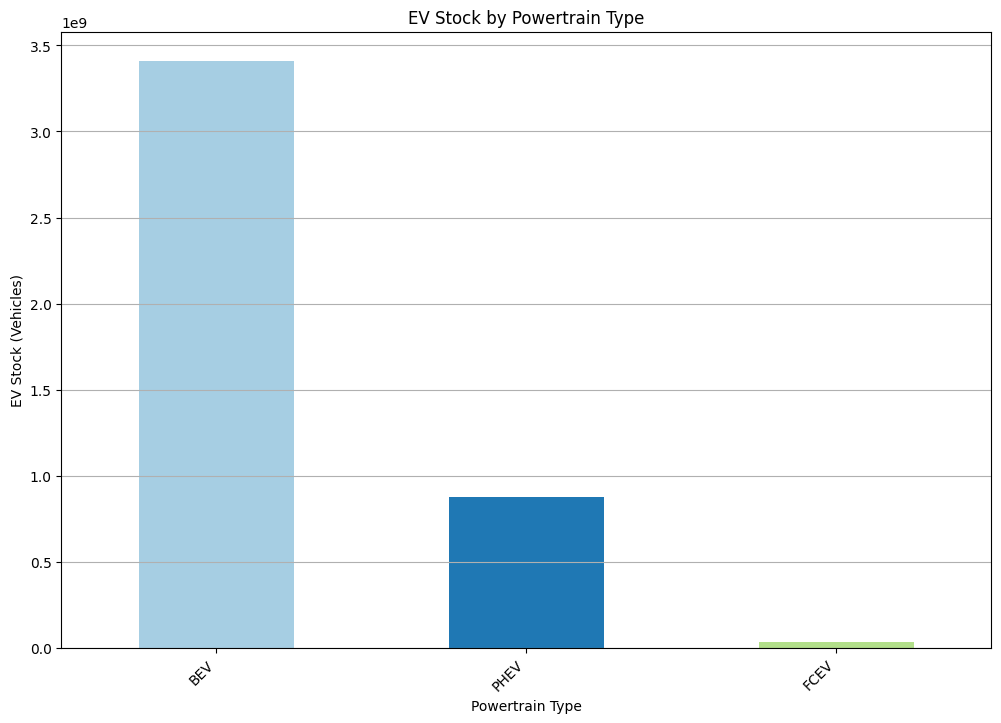

In [19]:
# Filter data for EV stock
ev_stock = df_ev_sales[df_ev_sales['parameter'] == 'EV stock']

# Aggregate EV stock by powertrain type
ev_stock_by_powertrain = ev_stock.groupby('powertrain')['value'].sum().sort_values(ascending=False)

# Plot EV stock by powertrain
plt.figure(figsize=(12, 8))
ev_stock_by_powertrain.plot(kind='bar', color=plt.get_cmap('Paired').colors)
plt.title('EV Stock by Powertrain Type')
plt.xlabel('Powertrain Type')
plt.ylabel('EV Stock (Vehicles)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


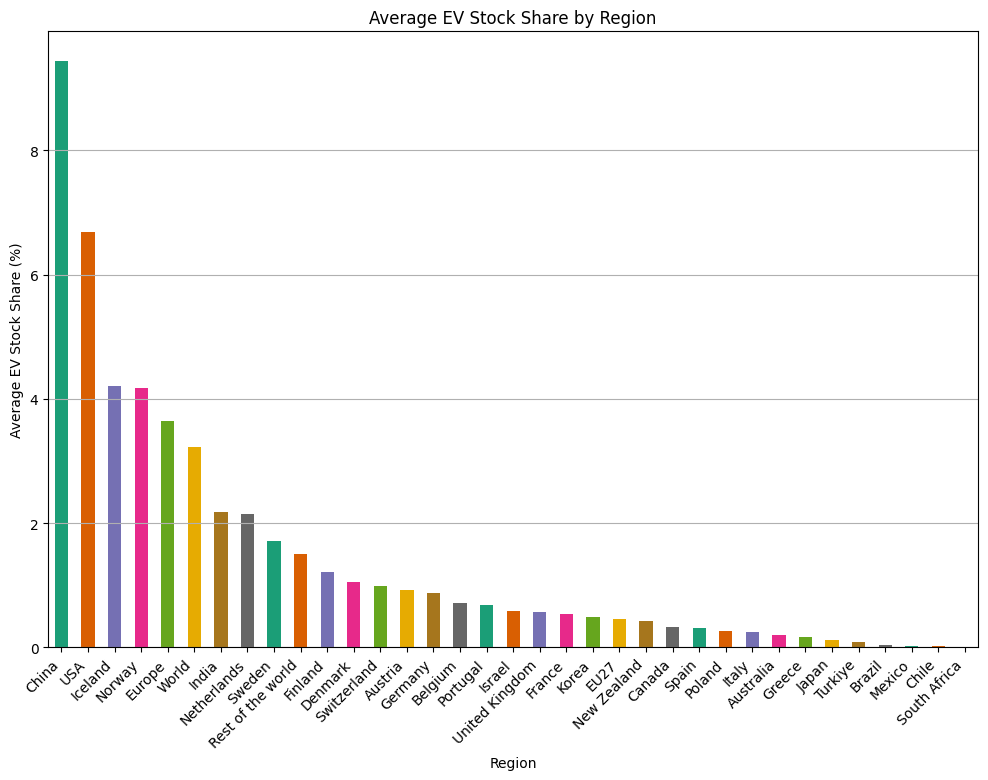

In [20]:
# Filter data for EV stock share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']

# Calculate average EV stock share by region
average_ev_stock_share_by_region = ev_stock_share.groupby('region')['value'].mean().sort_values(ascending=False)

# Plot average EV stock share by region
plt.figure(figsize=(12, 8))
average_ev_stock_share_by_region.plot(kind='bar', color=plt.get_cmap('Dark2').colors)
plt.title('Average EV Stock Share by Region')
plt.xlabel('Region')
plt.ylabel('Average EV Stock Share (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


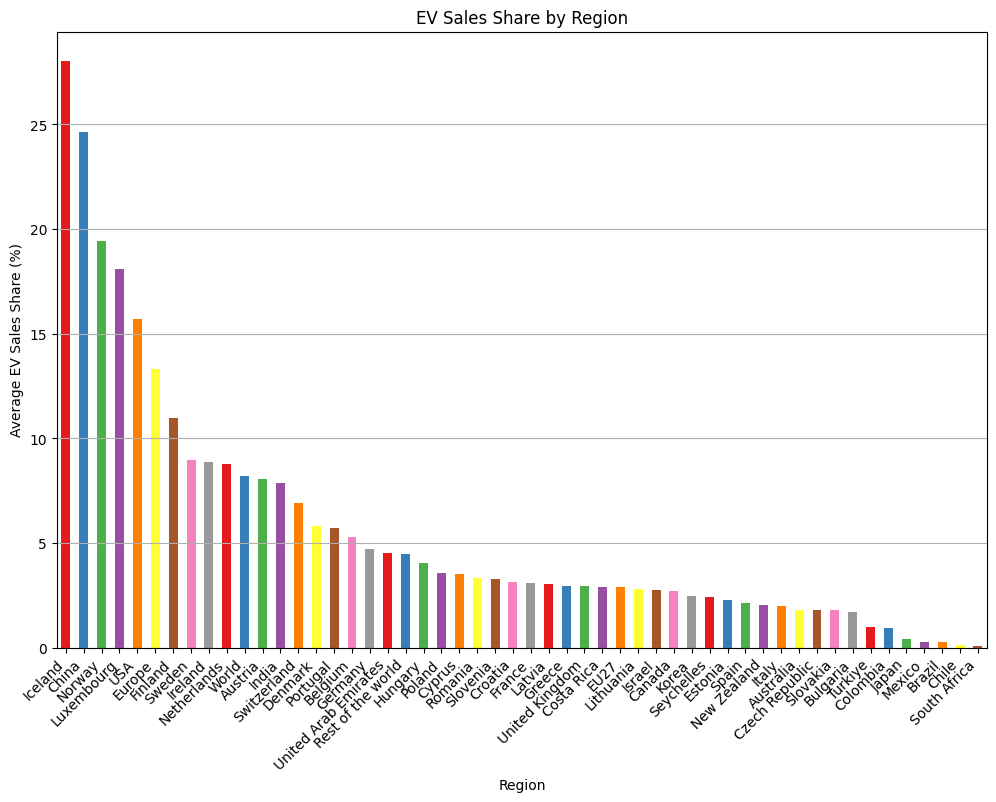

In [21]:
# Filter data for EV sales share
ev_sales_share = df_ev_sales[df_ev_sales['parameter'] == 'EV sales share']

# Aggregate EV sales share by region
ev_sales_share_by_region = ev_sales_share.groupby('region')['value'].mean().sort_values(ascending=False)

# Plot EV sales share by region
plt.figure(figsize=(12, 8))
ev_sales_share_by_region.plot(kind='bar', color=plt.get_cmap('Set1').colors)
plt.title('EV Sales Share by Region')
plt.xlabel('Region')
plt.ylabel('Average EV Sales Share (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

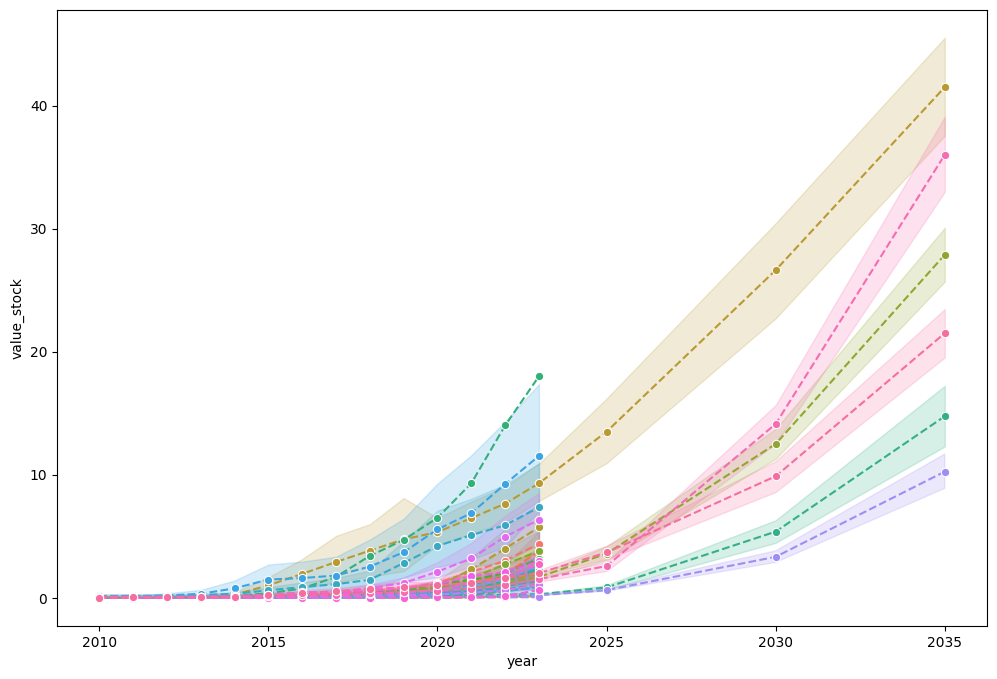

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for both EV stock share and EV sales share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']
ev_sales_share = df_ev_sales[df_ev_sales['parameter'] == 'EV sales share']

# Merge the two dataframes on year and region
comparison_df = pd.merge(ev_stock_share, ev_sales_share, on=['year', 'region'], suffixes=('_stock', '_sales'))

# Plot comparison of EV stock share and EV sales share
plt.figure(figsize=(12, 8))
sns.lineplot(data=comparison_df, x='year', y='value_stock', hue='region', marker='o', linestyle='--', label='EV Stock Share')
sns.lineplot(data=comparison_df, x='year', y='value_sales', hue='region', marker='x', linestyle='--', label='EV Sales Share')

# Set plot title and labels
plt.title('Comparison of EV Stock Share and EV Sales Share')
plt.xlabel('Year')
plt.ylabel('Percentage')

# Set legend title and grid
plt.legend(title='Region')
plt.grid(True)

# Show the plot
plt.show()

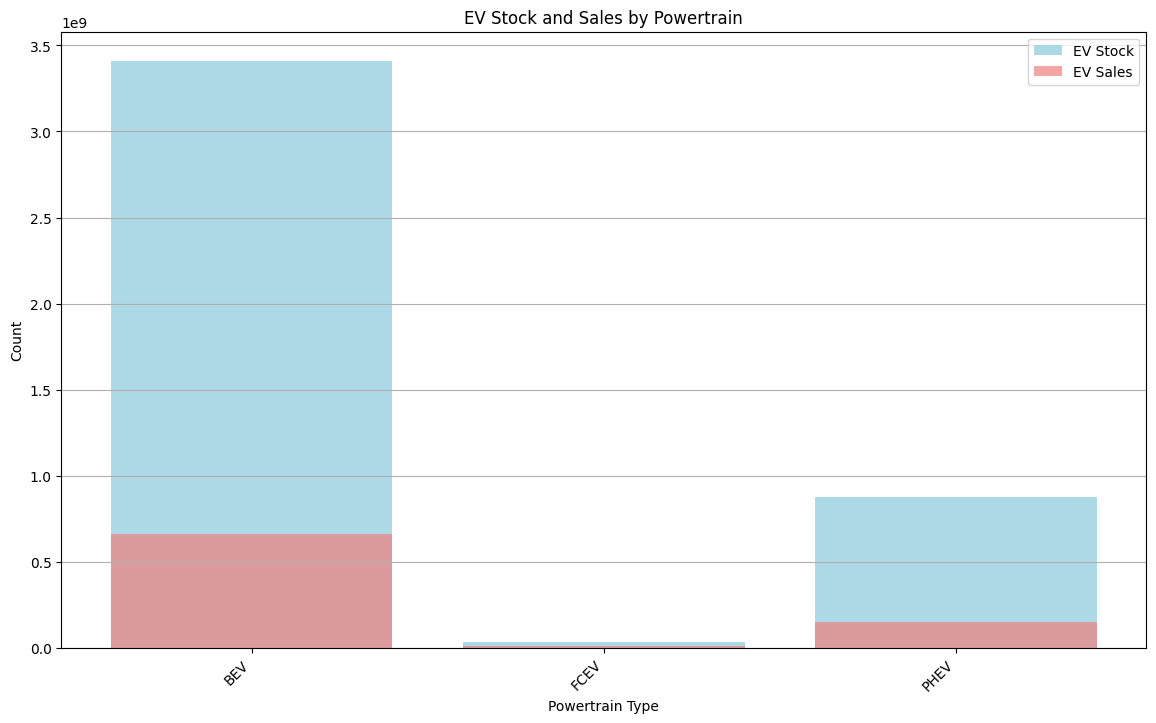

In [ ]:
# Filter data for EV stock and EV sales by powertrain
ev_stock = df_ev_sales[df_ev_sales['parameter'] == 'EV stock']
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']

# Aggregate by powertrain type
ev_stock_by_powertrain = ev_stock.groupby('powertrain')['value'].sum()
ev_sales_by_powertrain = ev_sales.groupby('powertrain')['value'].sum()

# Plot EV stock and sales by powertrain
plt.figure(figsize=(14, 8))
plt.bar(ev_stock_by_powertrain.index, ev_stock_by_powertrain, color='lightblue', label='EV Stock')
plt.bar(ev_sales_by_powertrain.index, ev_sales_by_powertrain, color='lightcoral', alpha=0.7, label='EV Sales')
plt.title('EV Stock and Sales by Powertrain')
plt.xlabel('Powertrain Type')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

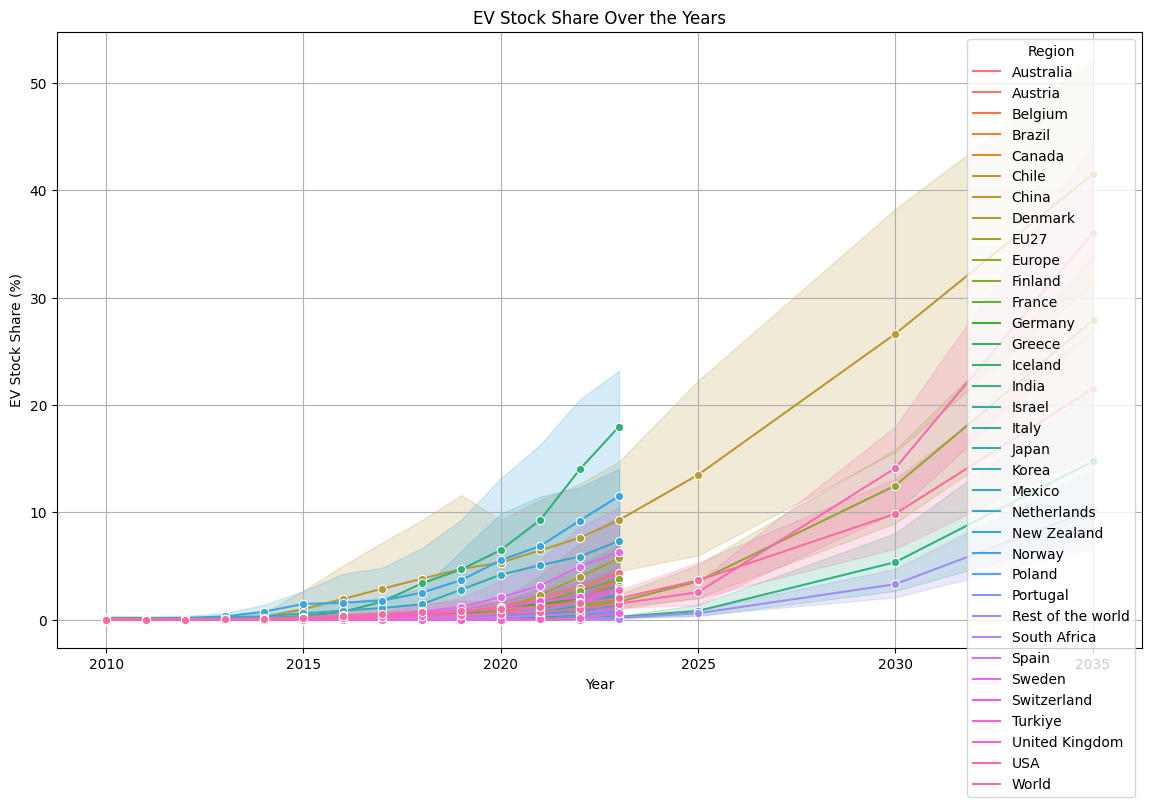

In [ ]:
# Filter data for EV stock share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']

# Plot EV stock share over the years for different regions
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='region', marker='o')
plt.title('EV Stock Share Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

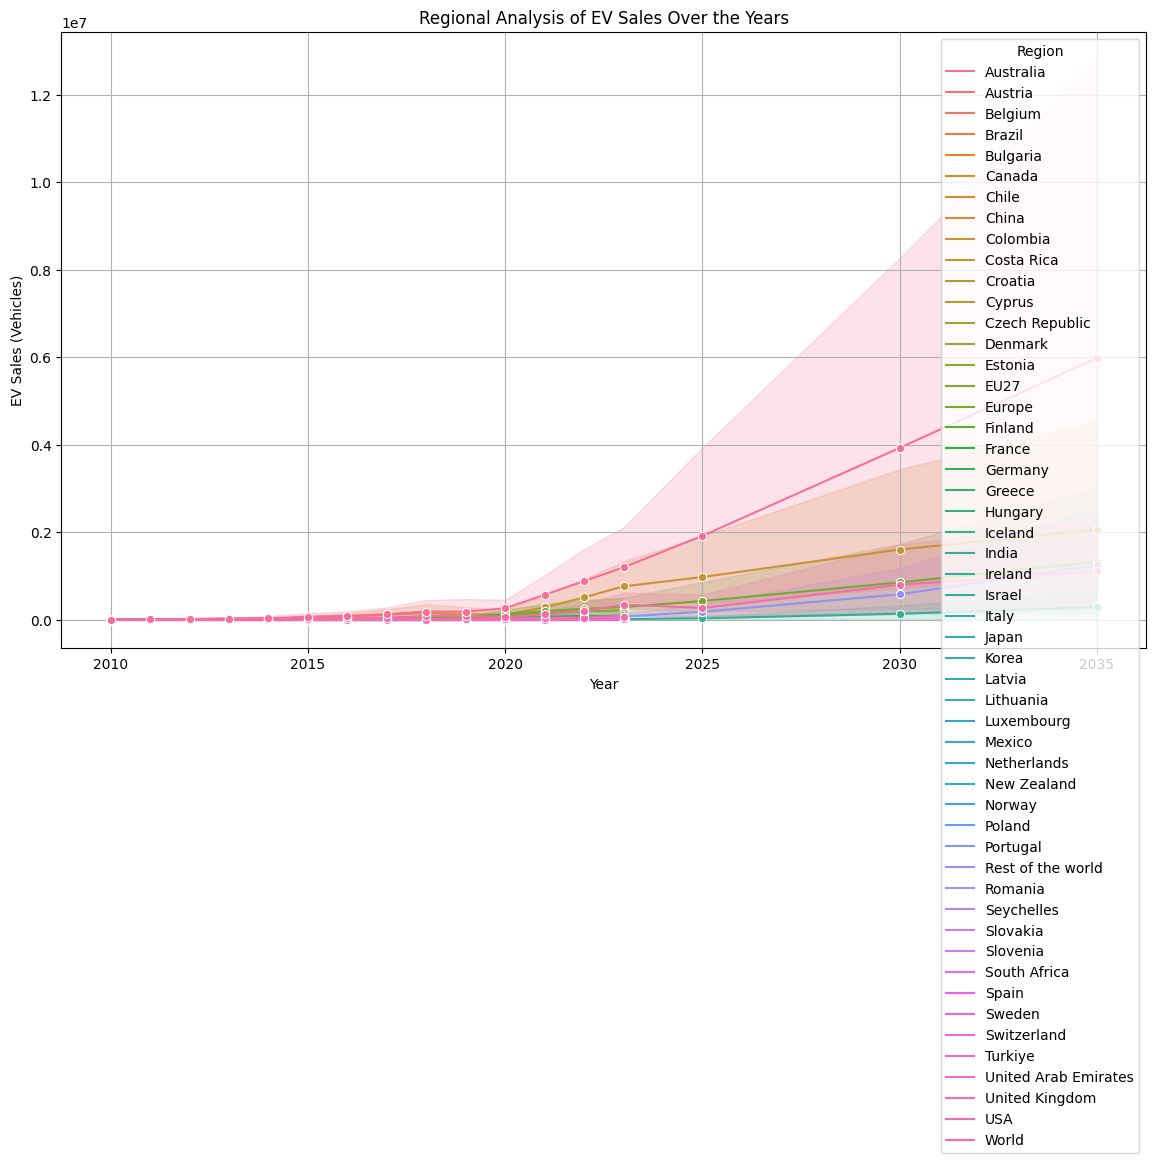

In [ ]:
# Filter data for EV sales
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']

# Plot EV sales for different regions over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales, x='year', y='value', hue='region', marker='o')
plt.title('Regional Analysis of EV Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Sales (Vehicles)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_10268\2889353817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ev_stock_share, x='region', y='value', palette='pastel')


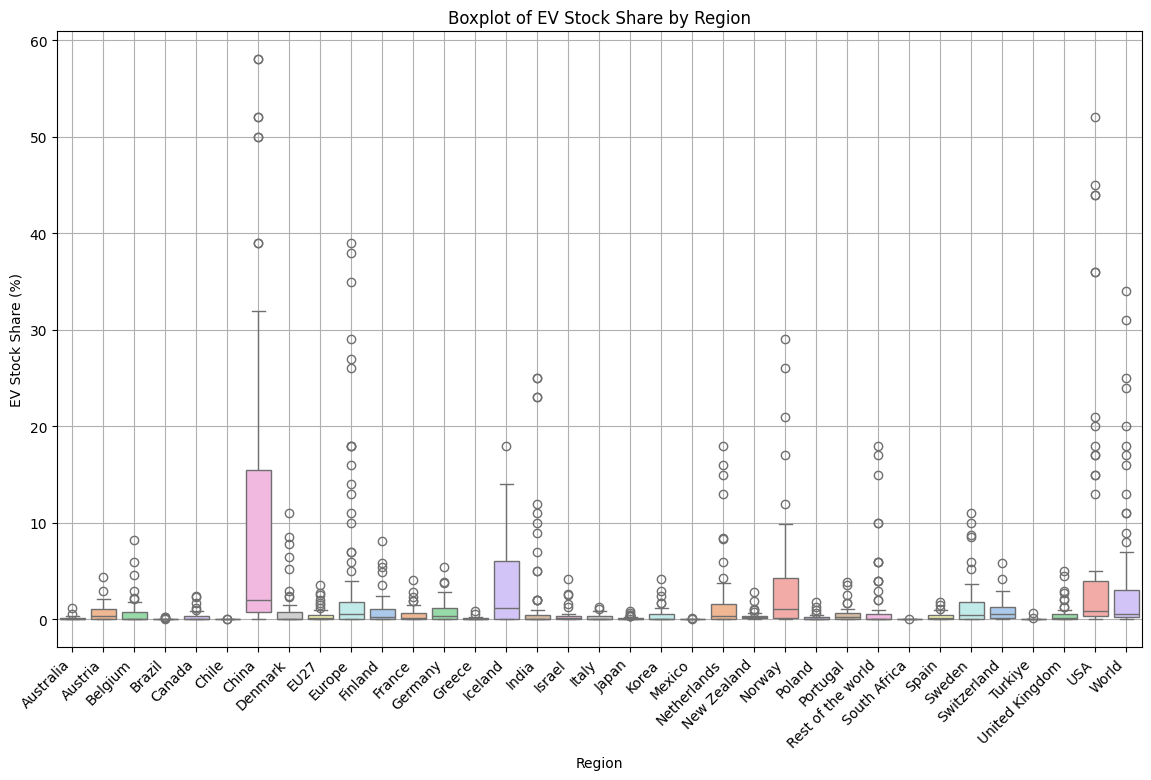

In [12]:
# Filter data for EV stock share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']

# Plot boxplot of EV stock share by region
plt.figure(figsize=(14, 8))
sns.boxplot(data=ev_stock_share, x='region', y='value', palette='pastel')
plt.title('Boxplot of EV Stock Share by Region')
plt.xlabel('Region')
plt.ylabel('EV Stock Share (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


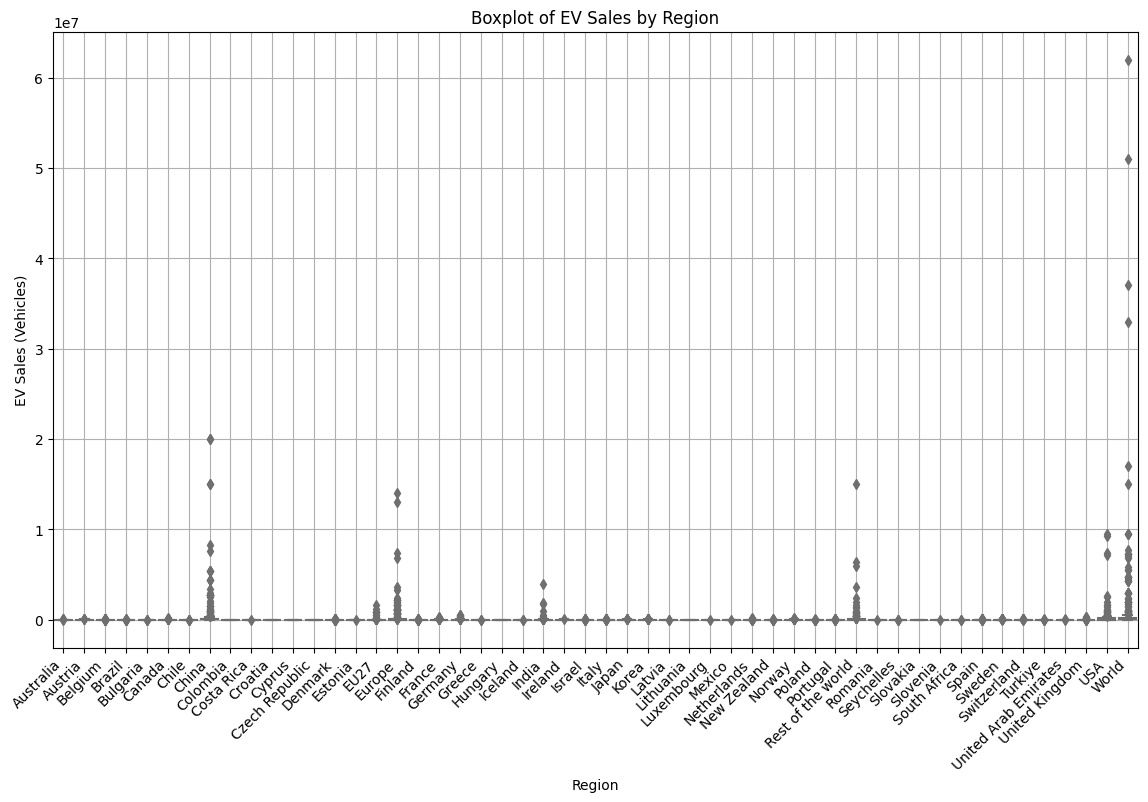

In [ ]:
# Filter data for EV sales
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']

# Plot boxplot of EV sales by region
plt.figure(figsize=(14, 8))
sns.boxplot(data=ev_sales, x='region', y='value', palette='pastel')
plt.title('Boxplot of EV Sales by Region')
plt.xlabel('Region')
plt.ylabel('EV Sales (Vehicles)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


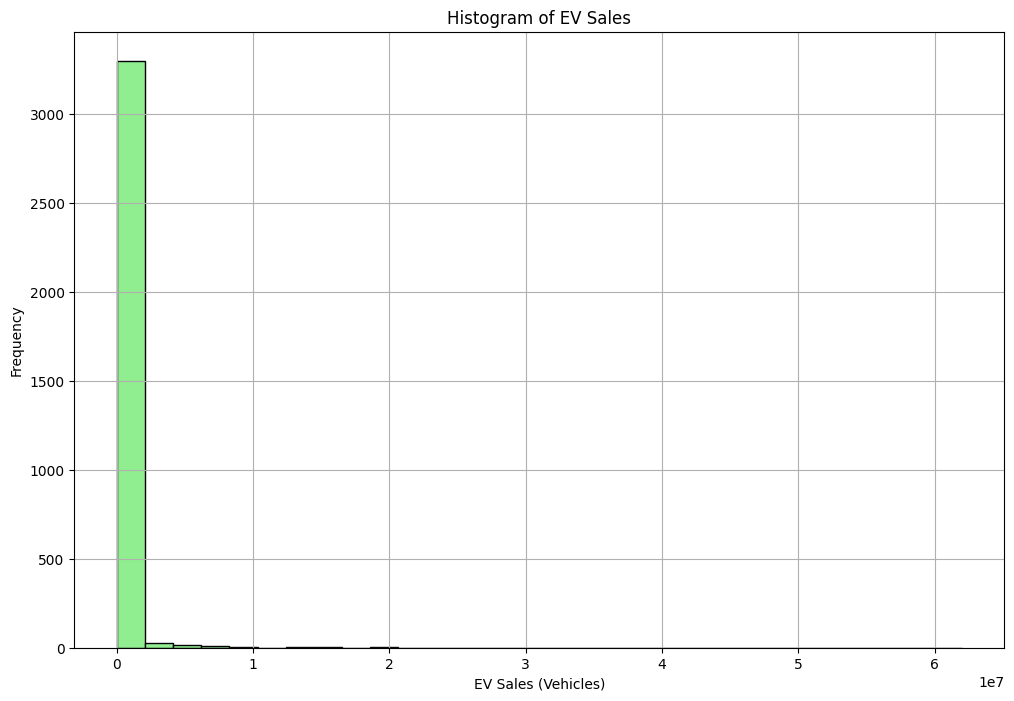

In [ ]:
# Filter data for EV sales
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']

# Plot histogram of EV sales
plt.figure(figsize=(12, 8))
plt.hist(ev_sales['value'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of EV Sales')
plt.xlabel('EV Sales (Vehicles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


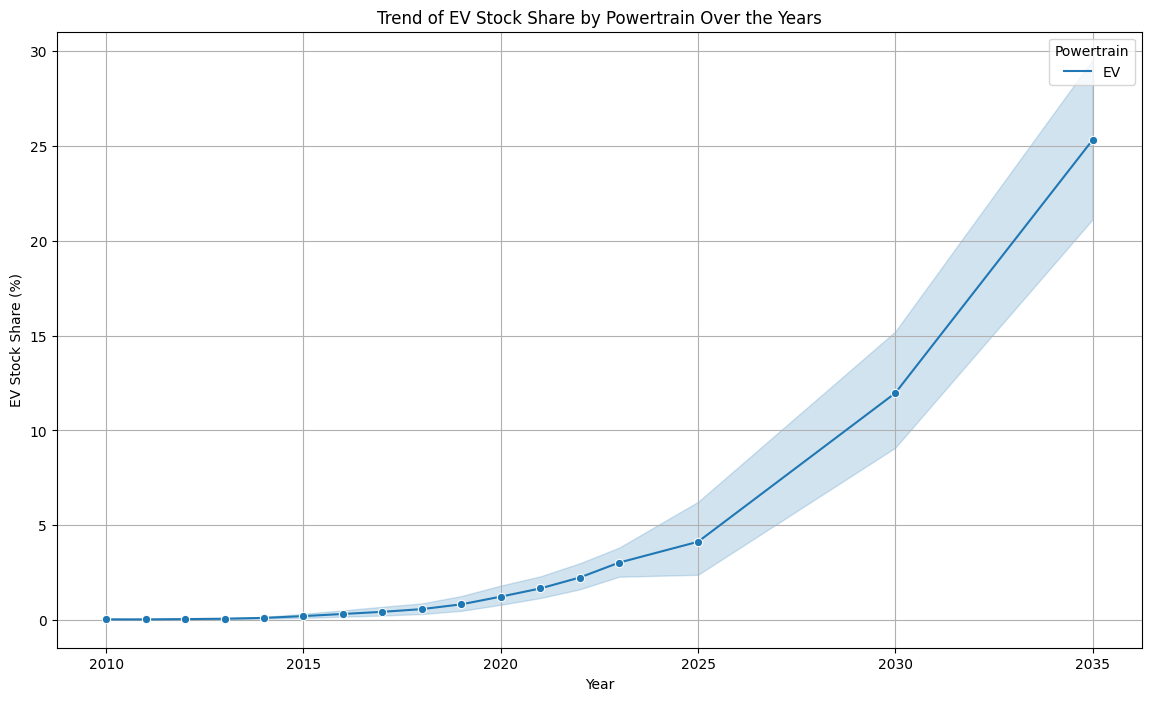

In [ ]:
# Filter data for EV stock share by powertrain
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']

# Plot trend of EV stock share by powertrain over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='powertrain', marker='o')
plt.title('Trend of EV Stock Share by Powertrain Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(title='Powertrain')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


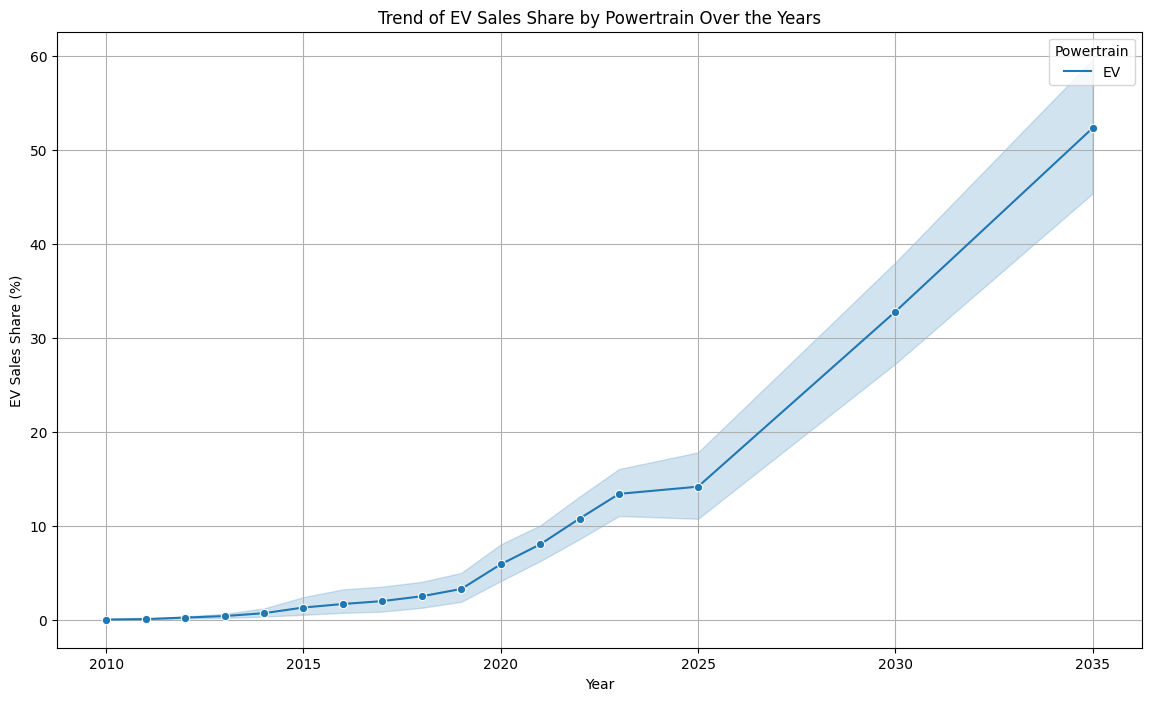

In [ ]:
# Filter data for EV sales share by powertrain
ev_sales_share = df_ev_sales[df_ev_sales['parameter'] == 'EV sales share']

# Plot trend of EV sales share by powertrain over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales_share, x='year', y='value', hue='powertrain', marker='o')
plt.title('Trend of EV Sales Share by Powertrain Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Sales Share (%)')
plt.legend(title='Powertrain')
plt.grid(True)
plt.show()


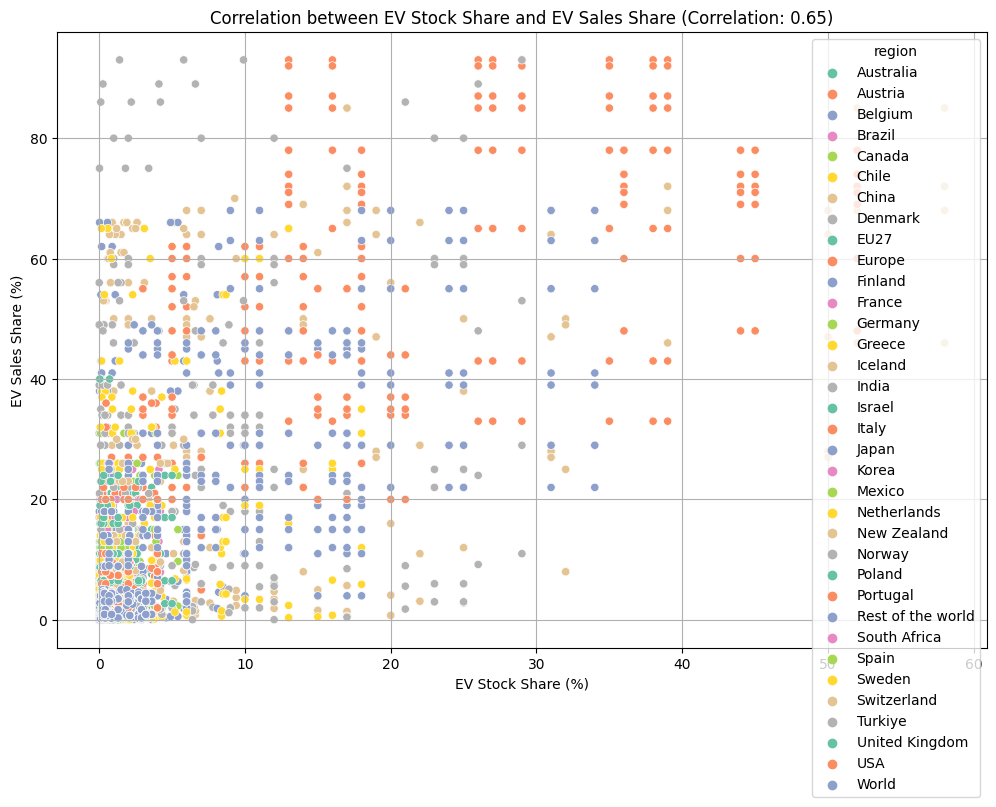

In [ ]:
# Filter data for EV stock share and EV sales share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']
ev_sales_share = df_ev_sales[df_ev_sales['parameter'] == 'EV sales share']

# Merge the two dataframes on year and region
correlation_df = pd.merge(ev_stock_share, ev_sales_share, on=['year', 'region'], suffixes=('_stock', '_sales'))

# Calculate and plot correlation between EV stock share and EV sales share
correlation = correlation_df[['value_stock', 'value_sales']].corr().iloc[0, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=correlation_df, x='value_stock', y='value_sales', hue='region', palette='Set2')
plt.title(f'Correlation between EV Stock Share and EV Sales Share (Correlation: {correlation:.2f})')
plt.xlabel('EV Stock Share (%)')
plt.ylabel('EV Sales Share (%)')
plt.grid(True)
plt.show()
